#Descripción
Se realizó una modelo predictivo basado en la regresión para calcular el precio de una vivienda función de las distintas variables del dataset, con el fin de eligir el modelo que mejor se adapte según las métricas analizadas.

Se plantea 3 escenarios hipotéticos para poder comparar el escenario más óptimo.

Para el proyecto, se utilizó el siguiente dataset público que encontramos en Kaggle. https://www.kaggle.com/shree1992/housedata

**Objetivo del proyecto**: Con el presente proyecto se pretende ser capaz de realizar un análisis exploratorio de un dataset, y realizar un modelo de regresión que permita predecir el precio de la vivienda.

#Fase 1: Importación del dataset.
Importación desde kaggle

In [ ]:
from google.colab import files
!pip install -q kaggle

In [ ]:
#subimos kaggle.json con el cliente
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#descargamos dataset
!kaggle datasets download -d shree1992/housedata

Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 71.7MB/s]


In [ ]:
#movemos fichero json a ubicacion correcta
!mv kaggle.json /root/.kaggle/kaggle.json

mv: cannot move 'kaggle.json' to '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#volvemos a cargar el dataset
!kaggle datasets download -d shree1992/housedata

Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
housedata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#descomprimimos el dataset
!unzip housedata.zip

Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


In [ ]:
import pandas as pd
#creamos una variable con el conjunto de datos
data = pd . read_csv ( "./data.csv" )

#Fase 2: Análisis exploratorio de los datos.

##Estructura y las características del DataFrame

Es importante conocer el nombre y significado de cada variable, entonces;

*   date: fecha
*   price: precios de la propiedad
*   bedrooms: número de dormitorios
*   bathrooms: número de baños
*   sqft_living: superficie de la casa(habitante)
*   sqft_lot: superficie del patio o solar
*   floors: número de pisos
*   waterfront: propiedad enfrente al mar
*   view: vistas
*   condition: condiciones
*   sqft_above: superficie del ático
*   sqft_basement: superficie del sótano
*   yr_built: año de construcción
*   yr_renovated: año de renovación
*   street: calle
*   city: ciudad
*   statezip: estado
*   country: país

In [ ]:
# exploracion de las primeras líneas dataset
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

*   El DataFrame contiene un total de 4600 filas indexadas de 0 a 4599.
*   Hay un total de 17 columnas en el DataFrame
*   El DataFrame tiene 4600 filas, y todas las filas tienen valores completos (en todas las columnas). Este dataset no contiene  filas con datos faltantes, por lo que no requiere tratamiento de datos faltantes.
*   Hay 13 columnas con datos numéricos (9 int64 y 4 float64)
*    Hay 5 columnas con datos categóricos(object)
*   El DataFrame ocupa aproximadamente 647 KB de memoria.
El DataFrame tiene una mezcla de datos categoricos y numerico, por lo que es necesario análizar esradísticas numericas y de categorización.

Es importante destacar que las variables waterfront y condition, son variables cátegoricas, la primera es dícotomica y la segunda es una variable ordinal, se puede interpretar que las condiciones de la propiedad se cálifica de 1 a 5. La siguiente función las tranforma en categoricas.

In [ ]:
import numpy as np
data['waterfront'] = data['waterfront'].astype('category')
data['condition'] = data['condition'].astype('category').cat.as_ordered()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           4600 non-null   object  
 1   price          4600 non-null   float64 
 2   bedrooms       4600 non-null   float64 
 3   bathrooms      4600 non-null   float64 
 4   sqft_living    4600 non-null   int64   
 5   sqft_lot       4600 non-null   int64   
 6   floors         4600 non-null   float64 
 7   waterfront     4600 non-null   category
 8   view           4600 non-null   int64   
 9   condition      4600 non-null   category
 10  sqft_above     4600 non-null   int64   
 11  sqft_basement  4600 non-null   int64   
 12  yr_built       4600 non-null   int64   
 13  yr_renovated   4600 non-null   int64   
 14  street         4600 non-null   object  
 15  city           4600 non-null   object  
 16  statezip       4600 non-null   object  
 17  country        4600 non-null   ob

##Resumen de variables numéricas

In [ ]:
#consultamos datos estadisticos generales: numero de elementos, media, desviacion, valor minimo, percentiles
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0
sqft_basement,4600.0,312.081522,464.137228,0.0,0.00,0.000000,610.00,4820.0
yr_built,4600.0,1970.786304,29.731848,1900.0,1951.00,1976.000000,1997.00,2014.0


Este resultado describe las estadísticas de las columnas numéricas del DataFrame. Las métricas incluidas son conteo (count), media (mean), desviación estándar (std), y los valores mínimos (min), máximos (max), y percentiles (25%, 50%, 75%).

*   price (precio de la propiedad): Tiene precio maximo de viviendda de 26,590,000; la media de los precios es 551,963
*   bedrooms(número de dormitorios): Tiene un rango de 0 a 9 habitaciones con una media de 3 habitaciones
*   bathrooms (número de baños): Un máximo de 8 baños y una media de 2 baños.
*   sqft_living (superficie de la casa): Con una media de 2139, un mínimos de 370 y un máximo de 13540.
*   floors (número de pisos): Con un tres pisos y medio la propiedad conmas pisos y una media de un piso y medio
*   view(vistas): mínimo 0 y máximo 4
*   yr_built(año de construcción): La prpiedad mas vieja contruida fue en 1900, y las mas reciente en 2014
*   yr_renovated(año de renovación): Presenta una distribución confusa debido a los datos mal registrados en el conjunto de datos. Más del 50% de los registros carecen de información sobre año de renovación, por lo que esta variable podría ser transformada o excluida del modelo para evitar alterar los resultados o generar confusión. Una transformación sugerida sería convertirla en una variable categórica y dicotómica, indicando únicamente si ha sido renovada o no.


##Resumen de variables categóricas

In [ ]:
data.describe(include=['object','category']).transpose()

,count,unique,top,freq
date,4600,70,2014-06-23 00:00:00,142
waterfront,4600,2,0,4567
condition,4600,5,3,2875
street,4600,4525,2520 Mulberry Walk NE,4
city,4600,44,Seattle,1573
statezip,4600,77,WA 98103,148
country,4600,1,USA,4600


Este resultado muestra métricas específicas de las variables categóricas, como el conteo (count), número de valores únicos (unique), valor más frecuente (top), y su frecuencia (freq).
*   waterfront (vista al mar): Tiene solo dos valores únicos. El valor más frecuente es 0, lo que indica que la mayoría de las propiedades no tienen vista al mar; únicamente 33 propiedades cuentan con vista al mar.
*   condition (condiciones): Presenta cinco valores únicos, siendo 3 el valor más frecuente, con 2875 propiedades en esta categoría.
*   Todas las propiedades están ubicadas en los Estados Unidos



In [ ]:
#consultamos si tenemos celdas sin valor
data.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


##Exploración Visual

###Gráficos de pastel

In [ ]:
import matplotlib.pyplot as plp
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
conteo = pd.Series(data['waterfront']).value_counts()

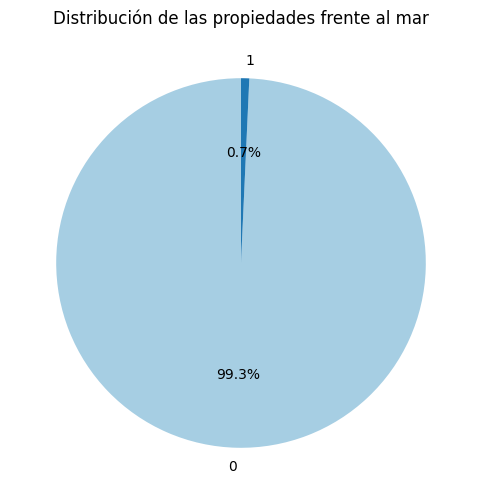

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90,colors=plt.cm.Paired.colors)
plt.title('Distribución de las propiedades frente al mar')
plt.show()

In [ ]:
conteoc = pd.Series(data['condition']).value_counts()
colors = ['teal','#4F6272', '#B7C3F3','#DD7596', '#8EB897']

fig = go.Figure(data=[go.Pie(labels=conteoc.index, values=conteoc)])
fig.update_layout(title_text="Distribución de las propiedades según su condición")
fig.show()

###Gráficos de barras

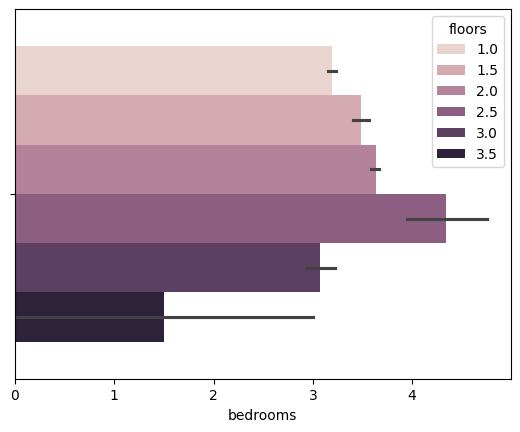

In [ ]:
sns.barplot(data=data, x='bedrooms', hue='floors')
plt.title('')
plt.show()

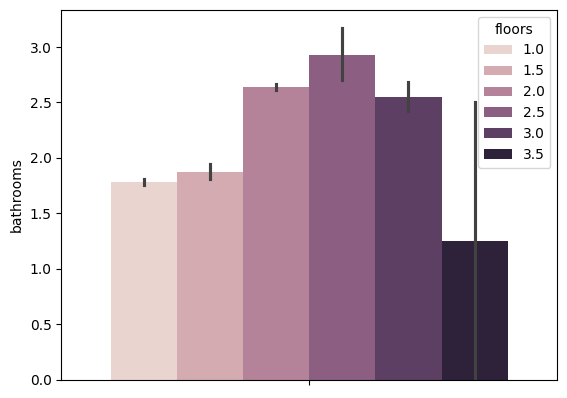

In [ ]:
sns.barplot(data=data, y='bathrooms', hue='floors')
plt.title('')
plt.show()

In [ ]:
ct1 = pd.Series(data['bedrooms']).value_counts()
ct2 = pd.Series(data['bathrooms']).value_counts()
ct3 = pd.Series(data['floors']).value_counts()
ct4 = pd.Series(data['view']).value_counts()
ct5 = pd.Series(data['yr_built']).value_counts()
ct6 = pd.Series(data['yr_renovated']).value_counts()

In [ ]:
ct6 = ct6.drop(0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'yr_renovated')

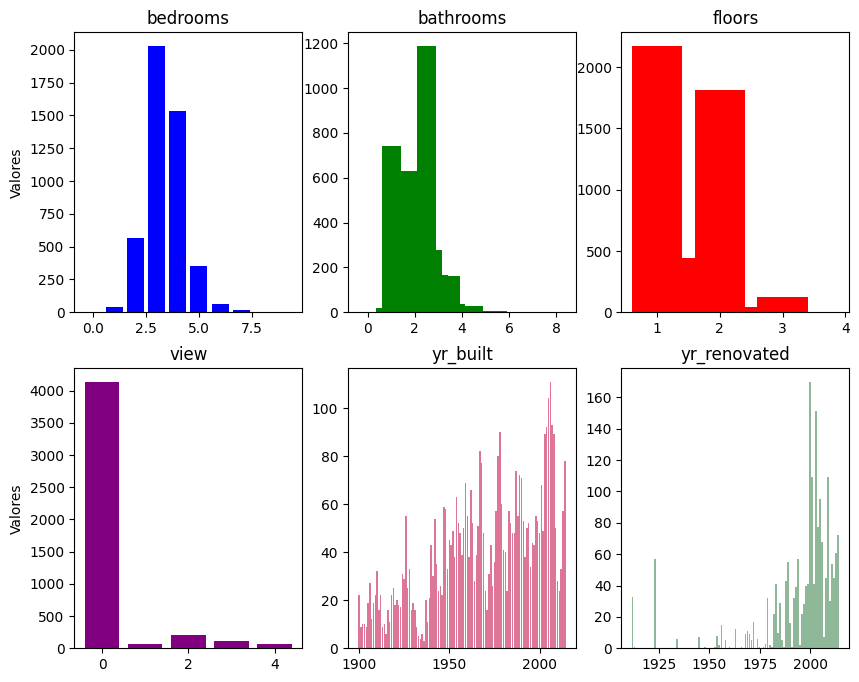

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8))  # 2 filas y 3 columnas de subgráficos
# Gráfico 1
axs[0, 0].bar(ct1.index, ct1, color='b')
axs[0, 0].set_title('bedrooms')
axs[0, 0].set_ylabel('Valores')
# Gráfico 2
axs[0, 1].bar(ct2.index, ct2, color='g')
axs[0, 1].set_title('bathrooms')

# Gráfico 3
axs[0, 2].bar(ct3.index, ct3, color='r')
axs[0, 2].set_title('floors')

# Gráfico 4
axs[1, 0].bar(ct4.index, ct4, color='purple')
axs[1, 0].set_title('view')
axs[1, 0].set_ylabel('Valores')

# Gráfico 5
axs[1, 1].bar(ct5.index, ct5, color='#DD7596')
axs[1, 1].set_title('yr_built')

# Gráfico 6
axs[1, 2].bar(ct6.index, ct6, color='#8EB897')
axs[1, 2].set_title('yr_renovated')

Interpretación de los gráficos:
*   Habitaciones: La mayoría de las habitaciones tienen entre 2 y 4 habitaciones. Hay un pico en el número de propiedades con 3 habitaciones.
*   Baños: La distribución se centra entre 1 a 3 baños, con una concentracion en 2.5 baños.
*   Pisos: La mayoría de las viviendas tienen 1 o 2 pisos.
*   Vistas: La mayoria de las propiedades no tienen una vista (categoria 0)
*   Año de construcción: Hay una amplia gama de años de construcción, con  un pico alrededor de los años de 2000.
*   Años de renovación: La mayoria de la viviendas renovadas fue recientemente.








###Histogramas

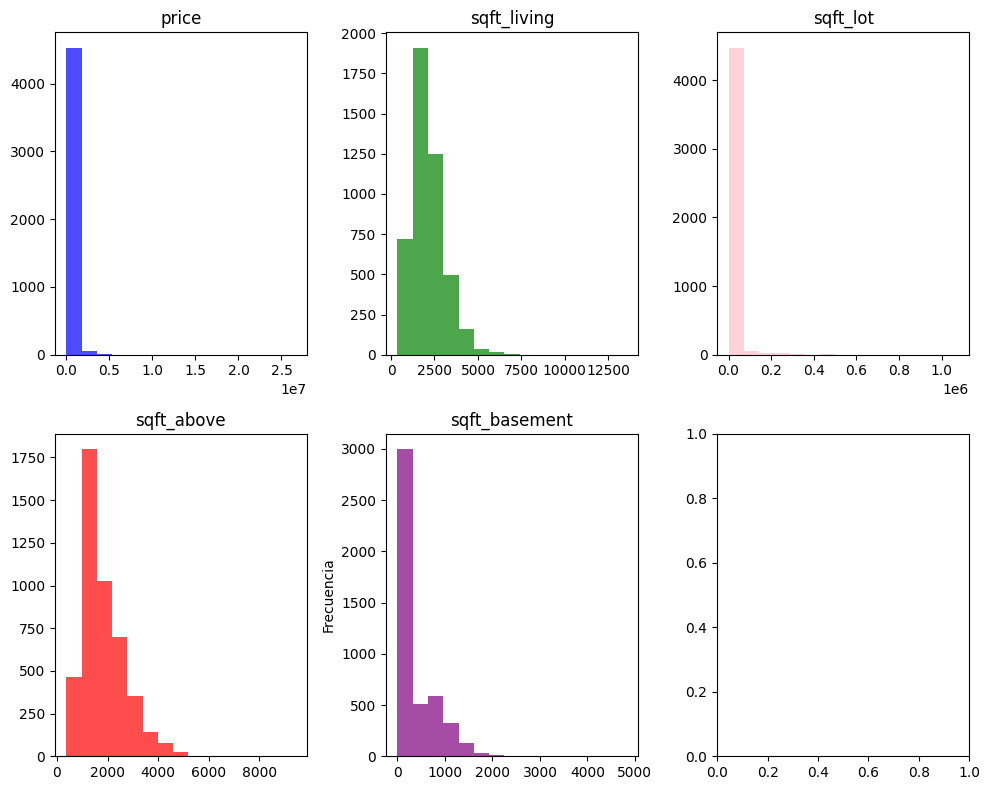

In [ ]:
#5 histogrmas
# Crear figura y subgráficos
fig, axs = plt.subplots(2, 3, figsize=(10, 8))  # 2 filas y 3 columnas de subgráficos

# Histograma 1
axs[0, 0].hist(data['price'], bins=15, color='blue', alpha=0.7)
axs[0, 0].set_title('price')


# Histograma 2
axs[0, 1].hist(data['sqft_living'], bins=15, color='green', alpha=0.7)
axs[0, 1].set_title('sqft_living')

# Histograma 3
axs[0, 2].hist(data['sqft_lot'], bins=15, color='pink', alpha=0.7)
axs[0, 2].set_title('sqft_lot')

# Histograma 4
axs[1, 0].hist(data['sqft_above'], bins=15, color='red', alpha=0.7)
axs[1, 0].set_title('sqft_above')


# Histograma 5
axs[1, 1].hist(data['sqft_basement'], bins=15, color='purple', alpha=0.7)
axs[1, 1].set_title('sqft_basement')
axs[1, 1].set_ylabel('Frecuencia')

# Ajustar diseño
plt.tight_layout()
plt.show()

Interpretación de cada histograma:
*   Precio: La mayoría de las propiedades tienen un precio que se concentra en un rango especifico, un rango que no es visible debido a la escala del eje x. El histograma tiene una cola larga hacia la derecha, indicando que existen algunas propiedades con precios signioficativamente más altos.
*   sqft_living: El area habitable de las propiedades se distribuye de manera más uniforme, pero si se presenta una cola larga hacia la derecha.
*   sqft_lot:El tamaño de los lotes tambien muestran una distribución amplia, con una tendencia a concentrase en tamaños pequeños, cola hacia la derecha.






### Gráficos de Cajas

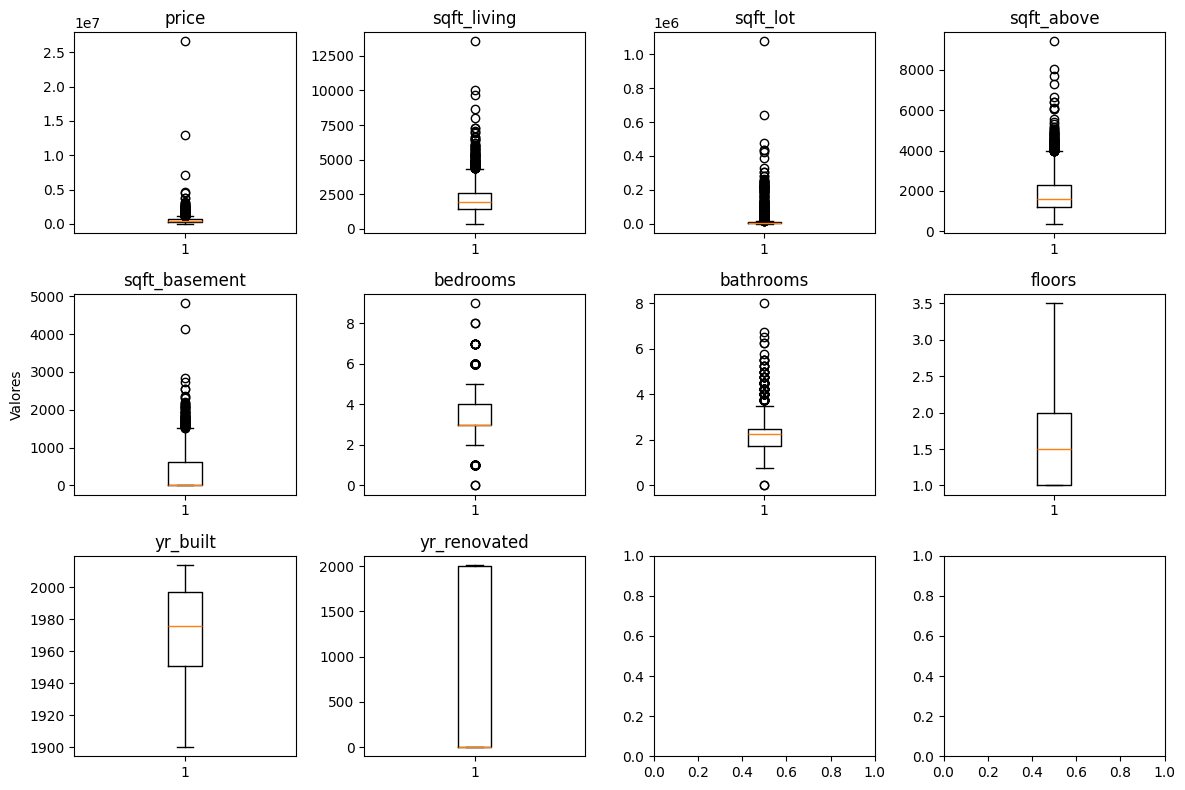

In [ ]:
# Crear figura y subgráficos
fig, axs = plt.subplots(3, 4, figsize=(12, 8))  # 3 filas y 4 columnas

# Gráfico de cajas 1
axs[0, 0].boxplot(data['price'])
axs[0, 0].set_title('price')

# Gráfico de cajas 2
axs[0, 1].boxplot(data['sqft_living'])
axs[0, 1].set_title('sqft_living')

# Gráfico de cajas 3
axs[0, 2].boxplot(data['sqft_lot'])
axs[0, 2].set_title('sqft_lot')

# Gráfico de cajas 4
axs[0, 3].boxplot(data['sqft_above'])
axs[0, 3].set_title('sqft_above')

# Gráfico de cajas 5
axs[1, 0].boxplot(data['sqft_basement'])
axs[1, 0].set_title('sqft_basement')
axs[1, 0].set_ylabel('Valores')

# Gráfico de cajas 6
axs[1, 1].boxplot(data['bedrooms'])
axs[1, 1].set_title('bedrooms')

# Gráfico de cajas 7
axs[1, 2].boxplot(data['bathrooms'])
axs[1, 2].set_title('bathrooms')

# Gráfico de cajas 8
axs[1, 3].boxplot(data['floors'])
axs[1, 3].set_title('floors')

# Gráfico de cajas 9
axs[2, 0].boxplot(data['yr_built'])
axs[2, 0].set_title('yr_built')

# Gráfico de cajas 10
axs[2, 1].boxplot(data['yr_renovated'])
axs[2, 1].set_title('yr_renovated')


# Ajustar diseño
plt.tight_layout()
plt.show()

Debido a la distribución de los histogramas y a la dificultad para interpretarlos de manera adecuada, se toma la decisión de eliminar los datos extremos. Es importante señalar que, para aplicar un modelo de regresión, es necesario cumplir con el criterio de normalidad de los datos. Sin embargo, como analista de datos, sugeriría explorar otras metodologías que no requieran cumplir con este criterio, como algunos métodos de machine learning que son más flexibles y no dependen de la normalidad ni de la homogeneidad de los datos. Modelos como los árboles de decisión, bosques aleatorios o máquinas de soporte vectorial pueden ser opciones viables para determinar el precio basado en esta base de datos, ya que no requieren supuestos estrictos sobre la distribución de los datos.

Sin embargo, para efectos prácticos y con el fin de cumplir con los objetivos del proyecto final, tengo dos opciones para mejorar el análisis. La primera opción consiste en continuar con la eliminación de los datos extremos y aplicar un modelo de regresión bajo los supuestos de normalidad y homogeneidad de los datos, lo que permitiría obtener un modelo más interpretable. La segunda opción es normalizar o estandarizar los datos, lo que podría ayudar a cumplir los requisitos de normalidad y homogeneidad, facilitando la aplicación de modelos de regresión más convencionales o de machine learning que dependen de estos supuestos.

In [ ]:
# Eliminar outliers usando IQR
Q1_1 = data['price'].quantile(0.25)
Q3_1 = data['price'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1
Q1_2 = data['sqft_living'].quantile(0.25)
Q3_2 = data['sqft_living'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2
Q1_3 = data['sqft_lot'].quantile(0.25)
Q3_3 = data['sqft_lot'].quantile(0.75)
IQR_3 = Q3_3 - Q1_3
Q1_4 = data['sqft_above'].quantile(0.25)
Q3_4 = data['sqft_above'].quantile(0.75)
IQR_4 = Q3_4 - Q1_4
Q1_5 = data['sqft_basement'].quantile(0.25)
Q3_5 = data['sqft_basement'].quantile(0.75)
IQR_5 = Q3_5 - Q1_5
Q1_6 = data['bedrooms'].quantile(0.25)
Q3_6 = data['bedrooms'].quantile(0.75)
IQR_6 = Q3_6 - Q1_6
Q1_7 = data['bathrooms'].quantile(0.25)
Q3_7 = data['bathrooms'].quantile(0.75)
IQR_7 = Q3_7 - Q1_7
Q1_8 = data['floors'].quantile(0.25)
Q3_8 = data['floors'].quantile(0.75)
IQR_8 = Q3_8 - Q1_8
Q1_9 = data['yr_built'].quantile(0.25)
Q3_9 = data['yr_built'].quantile(0.75)
IQR_9 = Q3_9 - Q1_9
Q1_10 = data['yr_renovated'].quantile(0.25)
Q3_10 = data['yr_renovated'].quantile(0.75)
IQR_10 = Q3_10 - Q1_10

In [ ]:
data1 = data[(data['price'] >= Q1_1 - 1.5 * IQR_1) & (data['price'] <= Q3_1 + 1.5 * IQR_1)]
data2 = data1[(data1['sqft_living'] >= Q1_2 - 1.5 * IQR_2) & (data1['sqft_living'] <= Q3_2 + 1.5 * IQR_2)]
data3 = data2[(data2['sqft_lot'] >= Q1_3 - 1.5 * IQR_3) & (data2['sqft_lot'] <= Q3_3 + 1.5 * IQR_3)]
data4 = data3[(data3['sqft_above'] >= Q1_4 - 1.5 * IQR_4) & (data3['sqft_above'] <= Q3_4 + 1.5 * IQR_4)]
data5 = data4[(data4['sqft_basement'] >= Q1_5 - 1.5 * IQR_5) & (data4['sqft_basement'] <= Q3_5 + 1.5 * IQR_5)]
data6 = data5[(data5['bedrooms'] >= Q1_6 - 1.5 * IQR_6) & (data5['bedrooms'] <= Q3_6 + 1.5 * IQR_6)]
data7 = data6[(data6['bathrooms'] >= Q1_7 - 1.5 * IQR_7) & (data6['bathrooms'] <= Q3_7 + 1.5 * IQR_7)]
data8 = data7[(data7['floors'] >= Q1_8 - 1.5 * IQR_8) & (data7['floors'] <= Q3_8 + 1.5 * IQR_8)]
data9 = data8[(data8['yr_built'] >= Q1_9 - 1.5 * IQR_9) & (data8['yr_built'] <= Q3_9 + 1.5 * IQR_9)]
data10 = data9[(data9['yr_renovated'] >= Q1_10 - 1.5 * IQR_10) & (data9['yr_renovated'] <= Q3_10 + 1.5 * IQR_10)]

In [ ]:
data10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3692 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           3692 non-null   object  
 1   price          3692 non-null   float64 
 2   bedrooms       3692 non-null   float64 
 3   bathrooms      3692 non-null   float64 
 4   sqft_living    3692 non-null   int64   
 5   sqft_lot       3692 non-null   int64   
 6   floors         3692 non-null   float64 
 7   waterfront     3692 non-null   category
 8   view           3692 non-null   int64   
 9   condition      3692 non-null   category
 10  sqft_above     3692 non-null   int64   
 11  sqft_basement  3692 non-null   int64   
 12  yr_built       3692 non-null   int64   
 13  yr_renovated   3692 non-null   int64   
 14  street         3692 non-null   object  
 15  city           3692 non-null   object  
 16  statezip       3692 non-null   object  
 17  country        3692 non-null   object 

Una vez eliminados los datos extremos, el conjunto de datos ahora cuenta con **3,692** registros, en comparación con los 4,600 datos originales. Esto implica una pérdida mínima de información, lo cual se considera aceptable para proceder con la aplicación del modelo de regresión. Este ajuste asegura que los datos sean más representativos y adecuados para cumplir con los supuestos requeridos por el modelo, mejorando así la calidad del análisis y las predicciones.

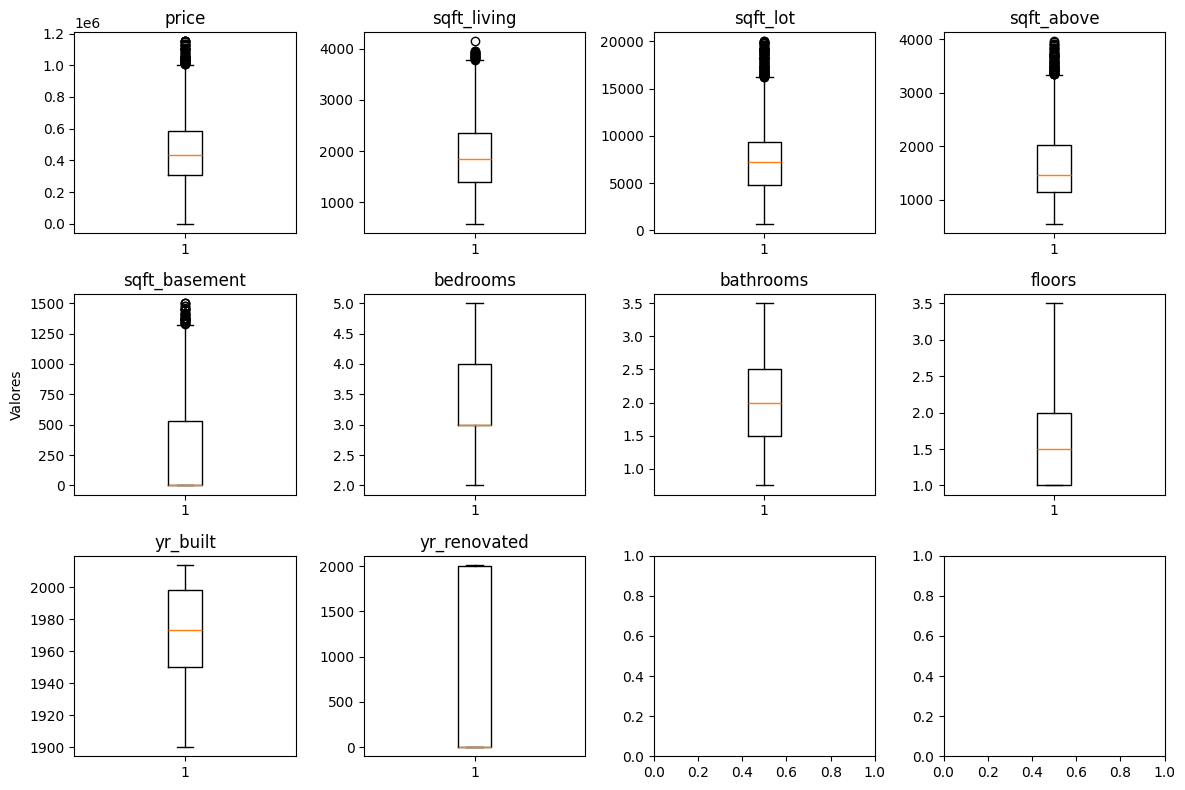

In [ ]:
# Crear figura y subgráficos
fig, axs = plt.subplots(3, 4, figsize=(12, 8))  # 3 filas y 4 columnas

# Gráfico de cajas 1
axs[0, 0].boxplot(data10['price'])
axs[0, 0].set_title('price')

# Gráfico de cajas 2
axs[0, 1].boxplot(data10['sqft_living'])
axs[0, 1].set_title('sqft_living')

# Gráfico de cajas 3
axs[0, 2].boxplot(data10['sqft_lot'])
axs[0, 2].set_title('sqft_lot')

# Gráfico de cajas 4
axs[0, 3].boxplot(data10['sqft_above'])
axs[0, 3].set_title('sqft_above')

# Gráfico de cajas 5
axs[1, 0].boxplot(data10['sqft_basement'])
axs[1, 0].set_title('sqft_basement')
axs[1, 0].set_ylabel('Valores')

# Gráfico de cajas 6
axs[1, 1].boxplot(data10['bedrooms'])
axs[1, 1].set_title('bedrooms')

# Gráfico de cajas 7
axs[1, 2].boxplot(data10['bathrooms'])
axs[1, 2].set_title('bathrooms')

# Gráfico de cajas 8
axs[1, 3].boxplot(data10['floors'])
axs[1, 3].set_title('floors')

# Gráfico de cajas 9
axs[2, 0].boxplot(data10['yr_built'])
axs[2, 0].set_title('yr_built')

# Gráfico de cajas 10
axs[2, 1].boxplot(data10['yr_renovated'])
axs[2, 1].set_title('yr_renovated')


# Ajustar diseño
plt.tight_layout()
plt.show()

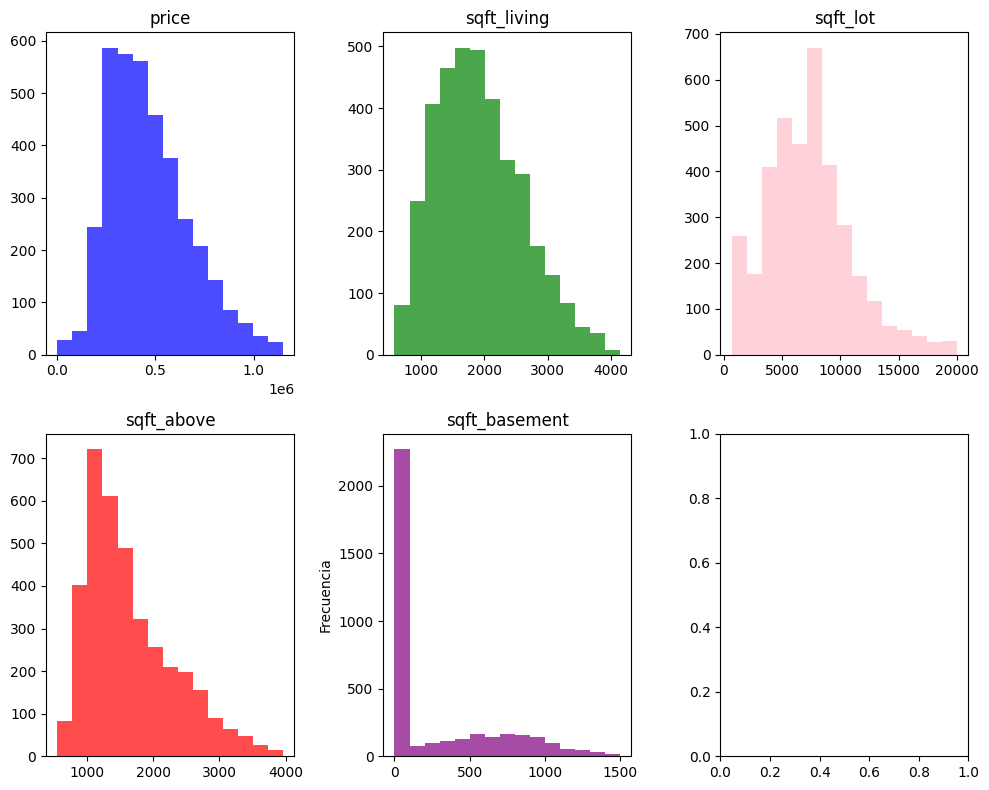

In [ ]:
#5 histogrmas
# Crear figura y subgráficos
fig, axs = plt.subplots(2, 3, figsize=(10, 8))  # 2 filas y 3 columnas de subgráficos

# Histograma 1
axs[0, 0].hist(data10['price'], bins=15, color='blue', alpha=0.7)
axs[0, 0].set_title('price')


# Histograma 2
axs[0, 1].hist(data10['sqft_living'], bins=15, color='green', alpha=0.7)
axs[0, 1].set_title('sqft_living')

# Histograma 3
axs[0, 2].hist(data10['sqft_lot'], bins=15, color='pink', alpha=0.7)
axs[0, 2].set_title('sqft_lot')

# Histograma 4
axs[1, 0].hist(data10['sqft_above'], bins=15, color='red', alpha=0.7)
axs[1, 0].set_title('sqft_above')


# Histograma 5
axs[1, 1].hist(data10['sqft_basement'], bins=15, color='purple', alpha=0.7)
axs[1, 1].set_title('sqft_basement')
axs[1, 1].set_ylabel('Frecuencia')

# Ajustar diseño
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'yr_renovated')

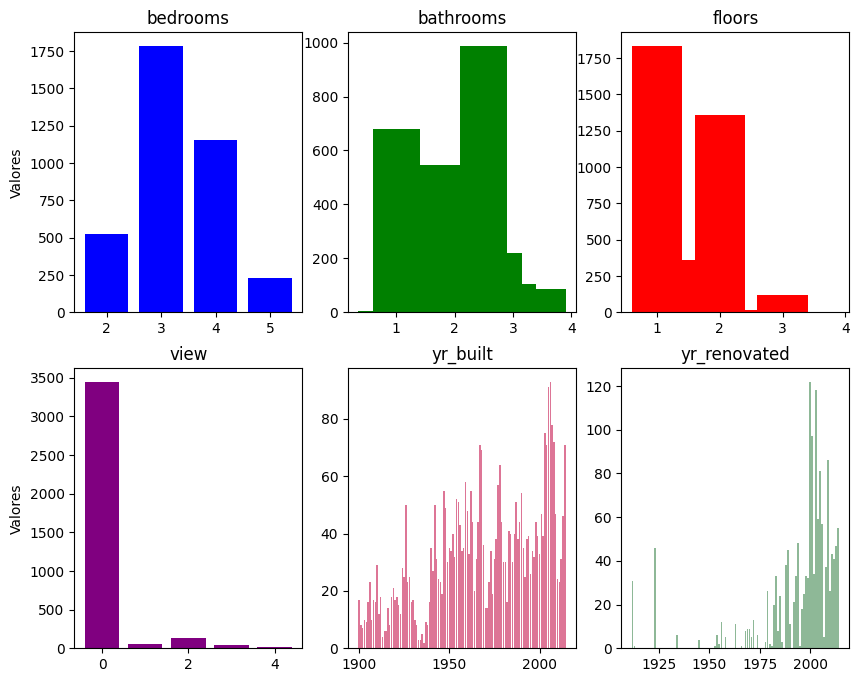

In [ ]:
ct1 = pd.Series(data10['bedrooms']).value_counts()
ct2 = pd.Series(data10['bathrooms']).value_counts()
ct3 = pd.Series(data10['floors']).value_counts()
ct4 = pd.Series(data10['view']).value_counts()
ct5 = pd.Series(data10['yr_built']).value_counts()
ct6 = pd.Series(data10['yr_renovated']).value_counts()
ct6 = ct6.drop(0)
fig, axs = plt.subplots(2, 3, figsize=(10, 8))  # 2 filas y 3 columnas de subgráficos
# Gráfico 1
axs[0, 0].bar(ct1.index, ct1, color='b')
axs[0, 0].set_title('bedrooms')
axs[0, 0].set_ylabel('Valores')
# Gráfico 2
axs[0, 1].bar(ct2.index, ct2, color='g')
axs[0, 1].set_title('bathrooms')

# Gráfico 3
axs[0, 2].bar(ct3.index, ct3, color='r')
axs[0, 2].set_title('floors')

# Gráfico 4
axs[1, 0].bar(ct4.index, ct4, color='purple')
axs[1, 0].set_title('view')
axs[1, 0].set_ylabel('Valores')

# Gráfico 5
axs[1, 1].bar(ct5.index, ct5, color='#DD7596')
axs[1, 1].set_title('yr_built')

# Gráfico 6
axs[1, 2].bar(ct6.index, ct6, color='#8EB897')
axs[1, 2].set_title('yr_renovated')

###Gráficos de disperción

<Figure size 1400x600 with 0 Axes>

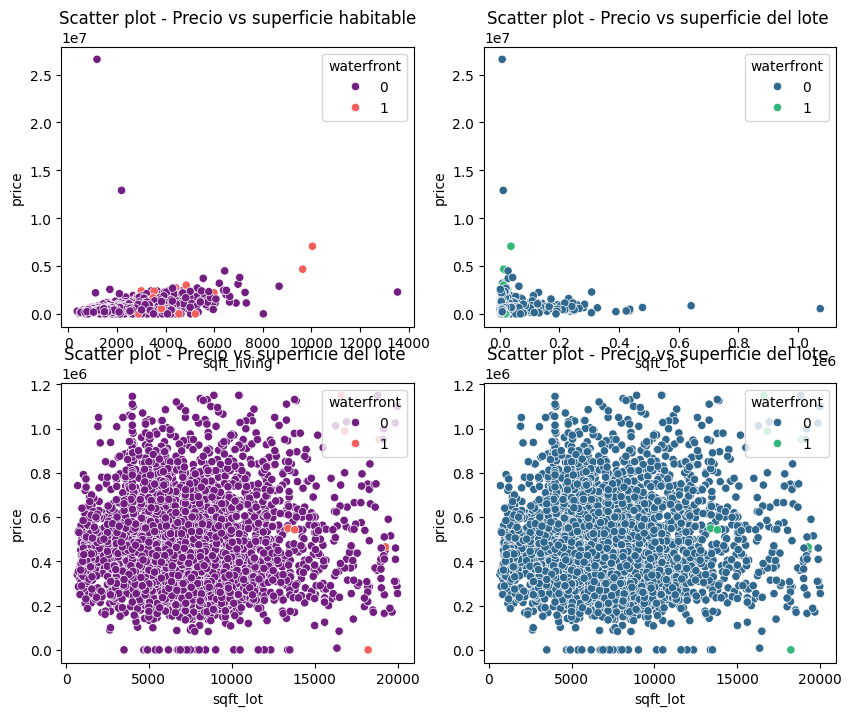

In [ ]:
# visualizacion distribución variables

f = plp.figure(figsize=(14,6))
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


sns.scatterplot(x='sqft_living',y='price',data=data,palette='magma',hue='waterfront',ax=axs[0, 0])
axs[0, 0].set_title('Scatter plot - Precio vs superficie habitable')


sns.scatterplot(x='sqft_lot',y='price',data=data,palette='viridis',hue='waterfront',ax=axs[0, 1])
axs[0, 1].set_title('Scatter plot - Precio vs superficie del lote ')


sns.scatterplot(x='sqft_lot',y='price',data=data10,palette='magma',hue='waterfront',ax=axs[1, 0])
axs[1, 0].set_title('Scatter plot - Precio vs superficie del lote ')


sns.scatterplot(x='sqft_lot',y='price',data=data10,palette='viridis',hue='waterfront',ax=axs[1, 1])
axs[1, 1].set_title('Scatter plot - Precio vs superficie del lote ')

plp.savefig('sc.png')

<Figure size 1400x600 with 0 Axes>

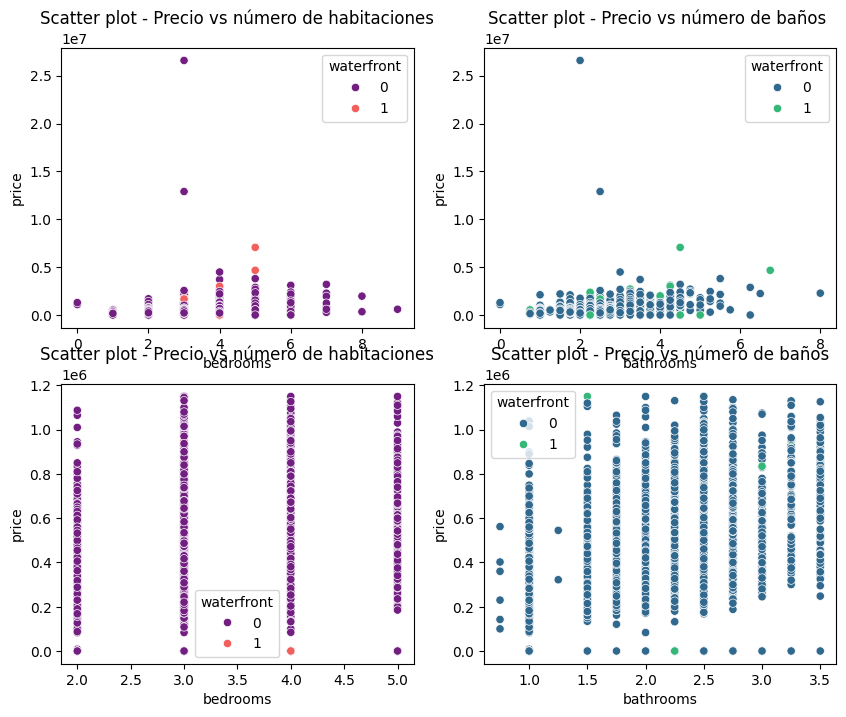

In [ ]:
# visualizacion distribución variables

f = plp.figure(figsize=(14,6))
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


sns.scatterplot(x='bedrooms',y='price',data=data,palette='magma',hue='waterfront',ax=axs[0, 0])
axs[0, 0].set_title('Scatter plot - Precio vs número de habitaciones')


sns.scatterplot(x='bathrooms',y='price',data=data,palette='viridis',hue='waterfront',ax=axs[0, 1])
axs[0, 1].set_title('Scatter plot - Precio vs número de baños ')


sns.scatterplot(x='bedrooms',y='price',data=data10,palette='magma',hue='waterfront',ax=axs[1, 0])
axs[1, 0].set_title('Scatter plot - Precio vs número de habitaciones')


sns.scatterplot(x='bathrooms',y='price',data=data10,palette='viridis',hue='waterfront',ax=axs[1, 1])
axs[1, 1].set_title('Scatter plot - Precio vs número de baños')

plp.savefig('sc.png')

Por último, en el análisis visual, se realizaron gráficos de dispersión. Los primeros gráficos corresponden a las variables precio vs. superficie habitable y precio vs. superficie del lote. En la parte superior, se presentan los gráficos de la base de datos original, mientras que en la parte inferior se muestran los gráficos generados con los datos limpios, es decir, sin los datos extremos.

A simple vista, no se observa una relación lineal clara entre las variables analizadas. Asimismo, no se identifica una división significativa que indique que las propiedades frente al mar tienen un impacto distintivo en la determinación del precio. Esto sugiere que otros factores podrían estar influyendo de manera más relevante en el comportamiento de los precios.



###Mapas de calor

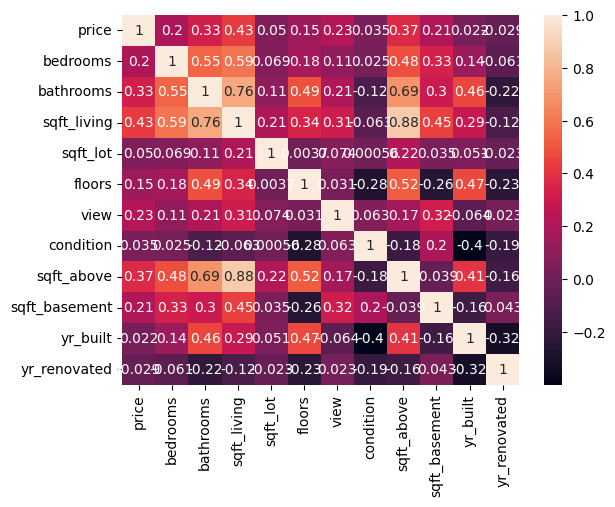

In [ ]:
# estudio correlacion de variables de la base de datos original
data['condition'] = data['condition'].astype('int64')
df = data.select_dtypes(include=['number'])
corr = df.corr()
sns.heatmap(corr, annot= True);

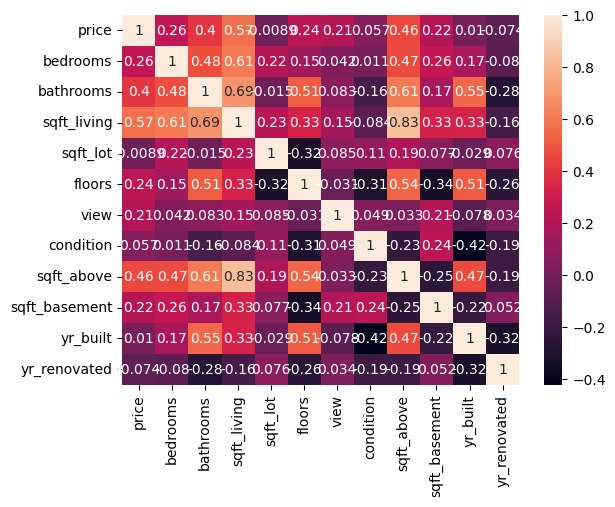

In [ ]:
# estudio correlacion de variables de la base de datos limpia
data10['condition'] = data['condition'].astype('int64')
df = data10.select_dtypes(include=['number'])
corr = df.corr()
sns.heatmap(corr, annot= True);

**Análisis de las Correlaciones Relevantes:**
 * Precio vs. Área habitable (sqft_living, sqft_above, sqft_basement): Existe una fuerte correlación positiva entre el precio y el área habitable total, así como con las áreas específicas por encima y por debajo del suelo. Esto es intuitivo: a mayor tamaño de la propiedad, mayor suele ser su precio.
 * Precio vs. Número de baños (bathrooms): También hay una correlación positiva moderada entre el precio y el número de baños. Esto sugiere que las propiedades con más baños tienden a ser más caras.
 * Precio vs. Número de habitaciones (bedrooms): Existe una correlación positiva, aunque un poco más débil, entre el precio y el número de habitaciones.

**Otras correlaciones interesantes:**
 * Área habitable vs. Número de baños y habitaciones: Existe una fuerte correlación positiva entre estas variables, lo que indica que las propiedades más grandes tienden a tener más habitaciones y baños.
 * Año de construcción vs. Número de baños: Hay una correlación positiva moderada, lo que sugiere que las casas más nuevas tienden a tener más baños.
Implicaciones para el Modelo de Regresión


In [ ]:
import plotly.express as px

In [ ]:
fig = px.imshow(corr,
                text_auto = True)

fig.show()

**Variables a incluir en el modelo**
Basándonos en la matriz de correlación, las siguientes variables parecen ser buenas candidatas para incluir en un modelo de regresión para predecir el precio de las propiedades:
 * Área habitable total (**sqft_living**): Es la variable con la correlación más fuerte con el precio.
 * Número de baños (**bathrooms**): Tiene una correlación positiva moderada con el precio y puede aportar valor al modelo.
 * Número de habitaciones (**bedrooms**): Aunque la correlación es más débil, podría incluirse.
 * Año de construcción (**yr_built**): Podría ser relevante, especialmente si hay una tendencia clara de aumento de precios con propiedades más nuevas.
 * Otras variables: Dependiendo del contexto y del objetivo del análisis, podrías considerar incluir otras variables como la condición de la propiedad, la presencia de una vista, etc.

La matriz de correlación proporciona una visión general de las relaciones entre las variables y ayuda a seleccionar las variables más relevantes para tu modelo de regresión. Sin embargo, es importante realizar un análisis más profundo y considerar otros factores antes de tomar decisiones definitivas.



#Fase 3: Fase de entrenamiento.

##Hipótesis 1
Se propone que un modelo predictivo de regresión lineal múltiple puede estimar de manera significativa el precio de una vivienda (y) en función de las siguientes variables independientes:


1.   **sqft_living:** Superficie habitable en pies cuadrados.
2.   **sqft_lot:** Superficie total del lote en pies cuadrados.
3.   **sqft_above:** Superficie sobre el nivel del suelo en pies cuadrados.
4.   **sqft_basement:** Superficie del sótano en pies cuadrados.
5.   **bedrooms:** Número de habitaciones.
6.   **bathrooms:** Número de baños.
7.   **floors:** Número de pisos.
8.   **condition:** Condición general de la vivienda.

Hipótesis Estadística:

1. Hipótesis Nula (Hₒ): Las variables independientes no tienen un efecto significativo en la predicción del precio de la vivienda.

β1 = β2 = . . . = β8 = 0
2. Hipótesis Alternativa (Hₐ): Al menos una de las variables independientes tiene un efecto significativo en la predicción del precio de la vivienda.

∃βᵢ ≠ 0 donde 𝑖 ∈ {1,2,...,8}. **texto en negrita**

Supuestos del Modelo:

1. Relación lineal entre las variables independientes y el precio de la vivienda.
2. Normalidad de los residuos.
3. Homocedasticidad de los errores (varianza constante).
4. Ausencia de colinealidad entre las variables independientes.

**Objetivo:**
Determinar si las variables mencionadas pueden explicar de manera significativa la variación en el precio de la vivienda y evaluar la capacidad predictiva del modelo.

In [ ]:
# preparamos el dataset de la hipótesis 1
# borramos las columnas categóricas
df_num = data10.select_dtypes(include=['number'])

In [ ]:
X_hipot1 = df_num.drop(columns=['price','view','yr_built','yr_renovated']) #  variables independientes
y_hipot1 = df_num['price'] # variable dependiente

In [ ]:
X_hipot1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement
0,3.0,1.50,1340,7912,1.5,3,1340,0
2,3.0,2.00,1930,11947,1.0,4,1930,0
3,3.0,2.25,2000,8030,1.0,4,1000,1000
4,4.0,2.50,1940,10500,1.0,4,1140,800
5,2.0,1.00,880,6380,1.0,3,880,0


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

A diferencia de la función utilizada para crear el modelo con LinearRegression de scikit-learn, optaré por utilizar OLS de statsmodels, ya que considero que es una herramienta mucho más completa para la interpretación y comparación de modelos de regresión. Con OLS, es posible obtener un análisis detallado de los coeficientes, incluyendo los valores p (p-values), intervalos de confianza y estadísticas de diagnóstico, lo que permite identificar y evaluar cuáles son las variables más influyentes en el modelo.

Además, el resumen generado por OLS facilita la validación de supuestos como la significancia de los coeficientes, la multicolinealidad y el ajuste general del modelo a través del R2
 ajustado y otras métricas estadísticas. Estas características son esenciales para una comprensión más profunda del comportamiento del modelo y para tomar decisiones fundamentadas sobre su optimización.

In [ ]:
# Agregar una constante para la intersección (bias o β0)
X_hipot1 = sm.add_constant(X_hipot1)

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_hipot1_train, X_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(X_hipot1, y_hipot1, test_size=0.20, random_state=43)

In [ ]:
# Crear el modelo de regresión lineal múltiple
model = sm.OLS(y_hipot1_train, X_hipot1_train).fit()

In [ ]:
# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     237.0
Date:                Fri, 03 Jan 2025   Prob (F-statistic):          3.45e-280
Time:                        20:48:35   Log-Likelihood:                -39683.
No. Observations:                2953   AIC:                         7.938e+04
Df Residuals:                    2945   BIC:                         7.943e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.757e+04    2.5e+04      2.701

La salida nos proporciona un resumen detallado del modelo para predecir el precio de una propiedad en función de las 8 variables independientes.
**Elementos importantes e interpretación:**
*   R-cuadrado: Indica la proporción de la variabilidad en el precio explicada por el modelo, aproximadamente un 35.9%. Aunque el modelo explica una parte de la variabilidad, queda una proporción aún mayor sin explicar. Esto sugiere que faltan variables importantes por incluir o que la relación entre las variables no es estrictamente lineal.
*   Coeficientes: Cada coeficiente asociado a una variable independiente representa el cambio esperado en el precio por un incremento de una unidad en dicha variable, manteniendo las demás constantes. Por ejemplo, un aumento de una habitación se asocia con un incremento de 36,220 dólares en el precio, según el modelo (asumiendo que los precios están en dólares, dado que los registros corresponden a propiedades en Estados Unidos).
*   Valor p: Indica la significancia estadística de cada coeficiente. Un valor p menor a 0.05 sugiere que el coeficiente es estadísticamente significativo.
*   Estadísticos de bondad de ajuste:
    *   Durbin-Watson: Evalúa la autocorrelación de los residuos. Un valor cercano a 2 indica que no hay autocorrelación. En este caso, el valor es 1.937, lo que indica que no hay problemas de autocorrelación en los residuos.
    *   Omnibus y Jarque-Bera: Evalúan si los residuos siguen una distribución normal. Los valores p bajos en ambas pruebas indican que los datos no se distribuyen normalmente, lo cual sugiere la presencia de asimetría.
    *   Cond. No (Número de condición de la matriz de diseño): Indica el nivel de multicolinealidad entre las variables independientes. Un valor alto sugiere problemas de multicolinealidad. En este modelo, el valor es demasiado alto, lo que indica un grave problema de multicolinealidad.

*  Variables significativas:
Según los valores p, solo el número de baños (bathrooms) no es significativo para la predicción del precio.

**Consideraciones**:
1. Para cumplir el criterio de normalidad:
  * Transformar los datos para normalizar su distribución (por ejemplo, utilizando transformaciones logarítmicas o de Box-Cox).
  * Alternativamente, emplear modelos no paramétricos, que no requieran asumir normalidad en los datos.
2. Para eliminar la multicolinealidad:
  * Identificar y eliminar variables altamente correlacionadas, es decir, eliminar una de ellas o combinar variables relacionadas.
  * Aplicar técnicas de regularización como Ridge y Lasso, que pueden reducir el impacto de la multicolinealidad y mejorar la estabilidad del modelo.




In [ ]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_hipot1_test)

In [ ]:
# Métricas del modelo
mse = mean_squared_error(y_hipot1_test, y_pred)
r2 = r2_score(y_hipot1_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

Error Cuadrático Medio (MSE): 23414785155.20437
Coeficiente de Determinación (R^2): 0.43177598874964673


##Hipótesis 2
Se propone que un modelo predictivo de regresión lineal múltiple puede estimar de manera significativa el precio de una vivienda (y) en función de las siguientes variables independientes:


1.   **sqft_living:** Superficie habitable en pies cuadrados.
2.   **sqft_lot:** Superficie total del lote en pies cuadrados.
3.   **bedrooms:** Número de habitaciones.
4.   **floors:** Número de pisos.
5.   **condition:** Condición general de la vivienda.
6.   **y_built:** Año de construcción.

En este caso, a diferencia del primer modelo, se decidió eliminar las variables que presentan una alta correlación con más de una variable independiente. Estas variables son sqft_above, sqft_basement y bathrooms. Además, se incorporó la variable yr_built, que representa el año de construcción de la propiedad, como una nueva variable independiente en el modelo.

Este ajuste busca reducir los problemas de multicolinealidad y mejorar la capacidad del modelo para interpretar y predecir el precio de las propiedades

Hipótesis Estadística:

1. Hipótesis Nula (Hₒ): Las variables independientes no tienen un efecto significativo en la predicción del precio de la vivienda.

β1 = β2 = . . . = β6 = 0
2. Hipótesis Alternativa (Hₐ): Al menos una de las variables independientes tiene un efecto significativo en la predicción del precio de la vivienda.

∃βᵢ ≠ 0 donde 𝑖 ∈ {1,2,...,6}.

In [ ]:
X_hipot2 = df_num.drop(columns=['price','view',
                                'yr_renovated','sqft_above','bathrooms','sqft_basement']) #  variables independientes
y_hipot2 = df_num['price'] # variable dependiente

In [ ]:
X_hipot2.head()

,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built
0,3.0,1340,7912,1.5,3,1955
2,3.0,1930,11947,1.0,4,1966
3,3.0,2000,8030,1.0,4,1963
4,4.0,1940,10500,1.0,4,1976
5,2.0,880,6380,1.0,3,1938


In [ ]:
# Agregar una constante para la intersección (bias o β0)
X_hipot2 = sm.add_constant(X_hipot2)

In [ ]:
# preparamos train data y test data
X_hipot2_train, X_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(X_hipot2, y_hipot2, test_size=0.20, random_state=43)

In [ ]:
# Crear el modelo de regresión lineal múltiple
model2 = sm.OLS(y_hipot2_train, X_hipot2_train).fit()

In [ ]:
# Resumen del modelo
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     326.3
Date:                Fri, 03 Jan 2025   Prob (F-statistic):          1.77e-321
Time:                        22:41:13   Log-Likelihood:                -39590.
No. Observations:                2953   AIC:                         7.919e+04
Df Residuals:                    2946   BIC:                         7.924e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.435e+06   2.44e+05     14.077      

En resumen, aunque no se observa una mejora significativa en el desempeño del modelo, se verifica que todas las variables incluidas presentan coeficientes estadísticamente significativos. Sin embargo, persiste el problema del incumplimiento del supuesto de normalidad en los datos, así como la presencia de multicolinealidad entre las variables independientes, lo que podría estar afectando la estabilidad y precisión del modelo.

In [ ]:
# Predicciones en el conjunto de prueba
y_pred2 = model2.predict(X_hipot2_test)

In [ ]:
# Métricas del modelo
mse2 = mean_squared_error(y_hipot2_test, y_pred2)
r22 = r2_score(y_hipot2_test, y_pred2)

print(f"Error Cuadrático Medio (MSE): {mse2}")
print(f"Coeficiente de Determinación (R^2): {r22}")

Error Cuadrático Medio (MSE): 22137717407.031178
Coeficiente de Determinación (R^2): 0.46276754189418356


##Hipótesis 3
Esta hipótesis busca evaluar si la transformación de las variables (normalización) y la inclusión de una nueva variable (yr_built) tienen un impacto positivo en la capacidad del modelo para explicar la variabilidad del precio de las propiedades, reflejado en métricas como el
R2 ajustado, los valores p de los coeficientes y la reducción de problemas como la multicolinealidad y la falta de normalidad.

En este ejemplo se utiliza estandarización en las siguentes variables independientes:
1.   **sqft_living:** Superficie habitable en pies cuadrados.
2.   **sqft_lot:** Superficie total del lote en pies cuadrados.
3.   **sqft_above:** Superficie sobre el nivel del suelo en pies cuadrados.
4.   **sqft_basement:** Superficie del sótano en pies cuadrados.
5.   **bedrooms:** Número de habitaciones.
6.   **bathrooms:** Número de baños.
7.   **floors:** Número de pisos.
8.   **condition:** Condición general de la vivienda.
9.   **y_built:** Año de construcción.

Hipótesis Estadística:

1. Hipótesis Nula (Hₒ): La normalización de las variables independientes, incluyendo la variable adicional del año de construcción (yr_built), no mejora significativamente el desempeño del modelo de regresión lineal múltiple ni su capacidad para predecir el precio de una propiedad.

β1 = β2 = . . . = β9 = 0
2. Hipótesis Alternativa (Hₐ): La normalización de las variables independientes, junto con la inclusión de la variable del año de construcción (yr_built), mejora significativamente el desempeño del modelo de regresión lineal múltiple y permite obtener un modelo estadísticamente significativo para la predicción del precio de una propiedad.

∃βᵢ ≠ 0 donde 𝑖 ∈ {1,2,...,9}.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Separar variables independientes y dependiente
X = df_num[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors', 'condition','yr_built']]
y = df_num['price']

In [ ]:
# Normalizar las variables independientes
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Modelo de regresión lineal múltiple con scikit-learn
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicciones
y_pred = lr.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

Error Cuadrático Medio (MSE): 26343125336.191315
Coeficiente de Determinación (R^2): 0.4043021481762349


In [ ]:
# Usando statsmodels para análisis detallado
X_train_sm = sm.add_constant(X_train)  # Agregar la constante
model = sm.OLS(y_train, X_train_sm).fit()

# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     267.7
Date:                Fri, 03 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:23:54   Log-Likelihood:                -39509.
No. Observations:                2953   AIC:                         7.904e+04
Df Residuals:                    2944   BIC:                         7.909e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.648e+05   2884.264    161.150      0.0

A pesar de que se realizó una normalización de los datos, no se observa una mejora significativa en el rendimiento del modelo. Esto sugiere que las variables utilizadas hasta ahora no son suficientes para predecir de manera precisa el costo de la propiedad. Por lo tanto, es necesario analizar otras variables que podrían influir en el precio y explorar la posibilidad de incorporar nuevos factores en el modelo. Además, podría ser útil aplicar otros tipos de modelos de regresión, como regresión polinómica o modelos basados en machine learning, que no dependan tanto de las suposiciones de normalidad y linealidad de los datos. Esto permitirá evaluar si un enfoque diferente puede ofrecer una mejor predicción del precio de las propiedades.

##Análisis Extra

Una vez analizados los tres escenarios anteriores utilizando el modelo de regresión múltiple, se procedió a implementar dos modelos adicionales: Gradient Boosting y las Redes Neuronales, que son técnicas ampliamente utilizadas en problemas de predicción. Sin embargo, al ejecutar estos modelos, se comprobó que las variables analizadas continúan siendo insuficientes para predecir de manera precisa el precio de las propiedades. Esto sugiere que, aunque estos modelos más complejos pueden capturar relaciones no lineales y patrones más complejos, las variables actuales no reflejan completamente los factores que influyen en el precio de una propiedad. Por lo tanto, es necesario considerar nuevas variables o incluso reformular el enfoque para mejorar la capacidad predictiva del modelo.

####Modelo de Gradient Boosting

In [ ]:
# Separar variables independientes y dependiente
X_hipot4 = df_num.drop(columns=['price','view',
                                'yr_renovated']) #  variables independientes
y_hipot4 = df_num['price'] # variable dependiente

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_hipot4_train, X_hipot4_test, y_hipot4_train, y_hipot4_test = train_test_split(X_hipot4, y_hipot4, test_size=0.20, random_state=43)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Crear el modelo de Gradient Boosting
xgb_model = XGBRegressor(
    n_estimators=100,  # Número de árboles
    learning_rate=0.1,  # Tasa de aprendizaje
    max_depth=5,  # Profundidad máxima de los árboles
    random_state=42
)

In [ ]:
# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = xgb_model.predict(X_test)


In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resultados del modelo Gradient Boosting:")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

Resultados del modelo Gradient Boosting:
Error Cuadrático Medio (MSE): 25833785973.891586
Coeficiente de Determinación (R^2): 0.4158198538432384


####Modelo de Redes Neuronales

In [ ]:
# Normalizar las variables independientes
scaler = MinMaxScaler()
X_hipot4_train_scaled = scaler.fit_transform(X_hipot4_train)
X_hipot4_test_scaled = scaler.transform(X_hipot4_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Crear el modelo de red neuronal
model = Sequential([
    Dense(64, activation='relu', input_dim=X_hipot4_train.shape[1]),  # Capa oculta 1
    Dense(32, activation='relu'),  # Capa oculta 2
    Dense(1)  # Capa de salida (regresión)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Entrenar el modelo
history = model.fit(X_hipot4_train_scaled, y_hipot4_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Realizar predicciones
y_pred = model.predict(X_hipot4_test_scaled)


Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 32373612544.0000 - mean_squared_error: 32373612544.0000 - val_loss: 35574321152.0000 - val_mean_squared_error: 35574321152.0000
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32671750144.0000 - mean_squared_error: 32671750144.0000 - val_loss: 35493392384.0000 - val_mean_squared_error: 35493392384.0000
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 33386801152.0000 - mean_squared_error: 33386801152.0000 - val_loss: 35431673856.0000 - val_mean_squared_error: 35431673856.0000
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33344569344.0000 - mean_squared_error: 33344569344.0000 - val_loss: 35352633344.0000 - val_mean_squared_error: 35352633344.0000
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 32659910656.0000 - mean_squared_error: 32659910656.0000 - val_loss: 35279859712.0000 - val_mean_squared_error: 35279859712.0000
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss:

In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_hipot4_test, y_pred)
r2 = r2_score(y_hipot4_test, y_pred)

print("Resultados del modelo de Red Neuronal:")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

Resultados del modelo de Red Neuronal:
Error Cuadrático Medio (MSE): 26570786128.30514
Coeficiente de Determinación (R^2): 0.35518696516653936


#Fase 4: Evaluación y análisis de los resultados

Conclusiones:
A lo largo de los diferentes modelos probados para predecir el precio de las propiedades, se observaron varios puntos clave:

**Primer Modelo (Regresión Lineal Múltiple con 8 Variables):**
* MSE: 23,414,785,155.20
* R^2: 0.432

El primer modelo, utilizando 8 variables independientes, mostró un error cuadrático medio (MSE) relativamente alto y un coeficiente de determinación (R^2) moderado, indicando que solo el 43.2% de la variabilidad en el precio de las propiedades es explicada por el modelo. Esto sugiere que el modelo es bastante limitado en su capacidad para predecir el precio de las propiedades con precisión.

**Segundo Modelo (Regresión Lineal con Eliminación de Variables Insignificantes):**
* MSE: 22,137,717,407.03
* R^2: 0.463

Al eliminar la variable con un beta insignificante y abordar la multicolinealidad eliminando variables correlacionadas, el segundo modelo mostró una ligera mejora en su rendimiento en comparación con el primero. Sin embargo, la mejora no es significativa, ya que el coeficiente de determinación sigue siendo relativamente bajo y el error cuadrático medio aún es alto. Esto indica que, aunque la eliminación de variables irrelevantes mejora algo la precisión, las variables analizadas siguen siendo insuficientes para una predicción precisa.

**Tercer Modelo (Regresión Lineal con Normalización de Variables):**
* MSE: 26,343,125,336.19
* R^2: 0.404

El tercer modelo, que incluye la normalización de las variables independientes para mejorar la homogeneidad de los datos, no mostró una mejora en cuanto al desempeño del modelo. En realidad, se observó un aumento en el MSE, lo que indica que la normalización no fue suficiente para resolver los problemas de normalidad y colinealidad que persistieron. Este modelo tampoco cumplió con el criterio de normalidad, lo que sigue limitando su capacidad predictiva.

**Modelo de Gradient Boosting:**
* MSE: 25,833,785,973.89
* R^2: 0.416

El modelo de Gradient Boosting, aunque es más avanzado, no logró una mejora significativa en comparación con los modelos de regresión lineal. Aunque muestra un MSE más bajo que algunos de los modelos anteriores, el coeficiente de determinación sigue siendo bajo, lo que sugiere que las variables utilizadas aún no capturan bien los patrones que determinan el precio de las propiedades.

**Modelo de Redes Neuronales:**
* MSE: 26,570,786,128.31
* R^2: 0.355
Las Redes Neuronales mostraron el peor desempeño en términos de MSE y R^2. Aunque las redes neuronales tienen la capacidad de capturar relaciones no lineales complejas, en este caso, no lograron mejorar significativamente el modelo ni superar los resultados obtenidos con los modelos anteriores. Esto sugiere que las variables analizadas no tienen una relación suficientemente compleja o que los modelos no se ajustaron adecuadamente debido a la falta de datos relevantes.

**Conclusiones:**
Ninguno de los modelos probados logró una predicción suficientemente precisa del precio de las propiedades, lo que indica que las variables seleccionadas no son suficientes para capturar todos los factores determinantes del precio.
A pesar de los esfuerzos por mejorar el modelo con técnicas avanzadas como la normalización de variables, eliminación de colinealidad y el uso de modelos como Gradient Boosting y Redes Neuronales, el desempeño sigue siendo limitado.
Es necesario considerar nuevas variables o incluso realizar un análisis más profundo sobre las que ya se tienen para mejorar el poder predictivo de los modelos.
Dado que ninguno de los modelos cumplió completamente con los supuestos de normalidad y colinealidad, sería recomendable explorar modelos que no dependan tanto de estos supuestos, como los modelos de machine learning o técnicas basadas en árboles de decisión.